In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import kurtosis, skew
from sklearn import preprocessing

sns.set(color_codes=True) # add nice colors
%matplotlib inline


---

## Part 1

### Probability and Bayes Theorem (7 points)

**Q1.** A consumer research survey sampled 200 men to find out whether they prefer to
drink plain water or soft drink. 80 out of these 200 men prefer a soft drink. What is the
probability that a randomly chosen man will prefer a soft drink? (2 points)

In [3]:
total = 200
soft_drink = 80
prob = soft_drink/total
prob

0.4

**Q2.** From a full deck of 52 cards, 1 card is drawn randomly. What is the probability that
the card is either a spade or a king? (2 points)

In [4]:
total_cards = 52
spades = 13
kings = 4
spade_king = 1

probability = spades/total_cards + kings/total_cards - spade_king/total_cards
round(probability, 3)

0.308

**Q3.** A drilling company has estimated a 40% chance of striking oil for their new well. A
detailed test has been scheduled for more information. Historically, 60% of successful
wells have had detailed tests, and 20% of unsuccessful wells have had detailed tests.
Given that this well has been scheduled for a detailed test, what is the probability that
the well will be successful? (3 points)

In [5]:
success = 0.4
failure = 0.6
det_test_success = 0.6
det_test_failure = 0.2

prob = success * det_test_success / (success * det_test_success + failure * det_test_failure)
round(prob, 3)

0.667

### Normal Distribution (10 points)

**Q1.** There are 1000 students in a class. The average Score and the Variance of the
Score of the class is 240 and 400 respectively. The Scores of the students are normally
distributed. Rahul, a student in the class belongs to the 95th percentile in the class.
What is the actual Score Rahul has got? (3 points)

In [6]:
mean = 240
variance = 400 
st_dev = 20
z = norm.ppf(0.95)

x = z * st_dev + mean
round(x, 2)

272.9

**Q2.** The mean score on a college placement exam is 500 with a standard deviation of
100. Ninety-five percent of the test takers score above what? (3 points)


In [7]:
mean = 500
st_dev = 100
z = norm.ppf(1 - 0.95)

x = z * st_dev + mean
round(x, 2)

335.51

**Q3.** A speed-data of some cars is given. The speeds are normally distributed with a
mean of 70 km/hr and a standard deviation of 10 km/hr. (4 points)

**a)** What is the probability that a car picked at random is travelling at more than 100
km/hr?

In [8]:
mean = 70
st_dev = 10 
x = 100

z = (x - mean) / st_dev
prob_100 = stats.norm.cdf(z)
prob_more_100 = 1 - prob_100
round(prob_more_100, 6)

0.00135

**b)** What is the probability that the car speed is between 80 Km / hr and 100 Km / hr

In [9]:
x2 = 80
z2 = (x2 - mean) / st_dev
prob_100 = stats.norm.cdf(z)
prob_80 = stats.norm.cdf(z2)
prob_between_80_100 = prob_100 - prob_80
round(prob_between_80_100, 6)

0.157305

### Binomial Distribution (4 points)

**Q1.** You flip a fair coin 10 times. What is the probability of getting 8 or more heads? (2
points)
Hint - Use stats.binom.pmf() function for this.

In [10]:
prob_8 = stats.binom.pmf(k = 8, n = 10, p=0.5) # probability of getting 8 heads
prob_8

0.04394531249999999

In [11]:
prob_9 = stats.binom.pmf(k = 9, n = 10, p = 0.5) # probability of getting 9 heads
prob_9

0.00976562500000001

In [12]:
prob_10 = stats.binom.pmf(k = 10, n = 10, p = 0.5) # probability of getting 10 heads
prob_10

0.0009765625

In [13]:
res = prob_8 + prob_9 + prob_10
res

0.0546875

**Q2.** My Bank has a large Credit Card portfolio. Based on empirical data, they have
found that 60% of the customers pay their bill on time. If a sample of 10 accounts is
selected from the current database, construct the Probability Distribution of accounts
paying on time. (2 points)

In [14]:
n = 10
k = np.arange(0,10)
p = 0.6

In [15]:
binomial = stats.binom.pmf(k, n, p)

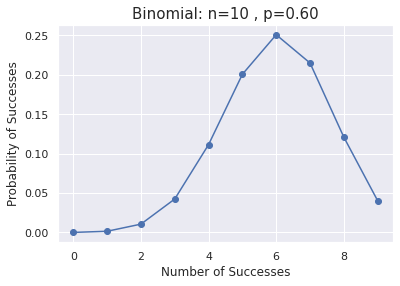

In [16]:
plt.plot(k ,binomial,'o-')
plt.title('Binomial: n=%i , p=%.2f' % (n,p), fontsize=15)
plt.xlabel('Number of Successes')
plt.ylabel('Probability of Successes')
plt.show()

### Poisson Distribution (4 points)

**Q1.** Assume a poisson distribution with lambda = 5.0. What is the probability that

**a)** X <= 1?

In [17]:
poison_0 = stats.poisson.pmf(0, 5.0)
poison_0

0.006737946999085467

In [18]:
poison_1 = stats.poisson.pmf(1, 5.0)
poison_1

0.03368973499542734

In [19]:
res = poison_0 + poison_1
res

0.040427681994512805

**b)** X > 1?
(2 points)

In [20]:
1 - res

0.9595723180054871

**2.** The number of defects per month in a manufacturing plant is known to follow a
Poisson distribution, with a mean of 2.5 defects a month. (2 points)

**a)** What is the probability that in a given month, no defects occur?

In [21]:
prob_no_defect = stats.poisson.pmf(0, 2.5)
prob_no_defect

0.0820849986238988

**b)** That at least one defect occurs?
Hint: Use Poisson distribution equation, find X = 0, Given lambda = 2.5

In [22]:
prob_one_defect = 1 - stats.poisson.pmf(0, 2.5)
prob_one_defect

0.9179150013761012

---

## Part 2

**1. Import the data and perform the following checks and write down your insights at every step.**

In [23]:
df = pd.read_csv("healthinsurance.csv")

In [24]:
df.head()

,age,sex,bmi,children,smoker,region,bloodpressure,diabetes,regular_ex,claim
0,54,female,47.4,0,0,southeast,90,1,0,63770.43
1,45,male,57.0,0,0,southeast,66,1,0,62592.87
2,52,male,34.5,3,0,northwest,70,0,0,60021.40
3,31,female,38.1,1,0,northeast,80,1,0,58571.07
4,33,female,59.0,0,0,northwest,50,1,0,55135.40


**a. Shape of the data**

In [25]:
df.shape

(1338, 10)

**b. Data types of attributes**

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1338 non-null   int64  
 1   sex            1338 non-null   object 
 2   bmi            1338 non-null   float64
 3   children       1338 non-null   int64  
 4   smoker         1338 non-null   int64  
 5   region         1338 non-null   object 
 6   bloodpressure  1338 non-null   int64  
 7   diabetes       1338 non-null   int64  
 8   regular_ex     1338 non-null   int64  
 9   claim          1338 non-null   float64
dtypes: float64(2), int64(6), object(2)
memory usage: 104.7+ KB


**c. 5-point summary of the relevant attributes**

In [27]:
df.describe()

,age,bmi,children,smoker,bloodpressure,diabetes,regular_ex,claim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.808281,1.094918,0.144245,68.977578,0.687593,0.319133,13270.422414
std,14.049960,6.282207,1.205493,0.351469,19.327770,0.463648,0.466315,12110.011240
min,18.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,0.000000,64.000000,0.000000,0.000000,4740.287500
50%,39.000000,30.500000,1.000000,0.000000,72.000000,1.000000,0.000000,9382.030000
75%,51.000000,34.800000,2.000000,0.000000,80.000000,1.000000,1.000000,16639.915000
max,64.000000,62.000000,5.000000,1.000000,122.000000,1.000000,1.000000,63770.430000


**d. Missing values**

In [28]:
# missing values
df.isnull().sum()

age              0
sex              0
bmi              0
children         0
smoker           0
region           0
bloodpressure    0
diabetes         0
regular_ex       0
claim            0
dtype: int64

**e. Correlation among the attributes**

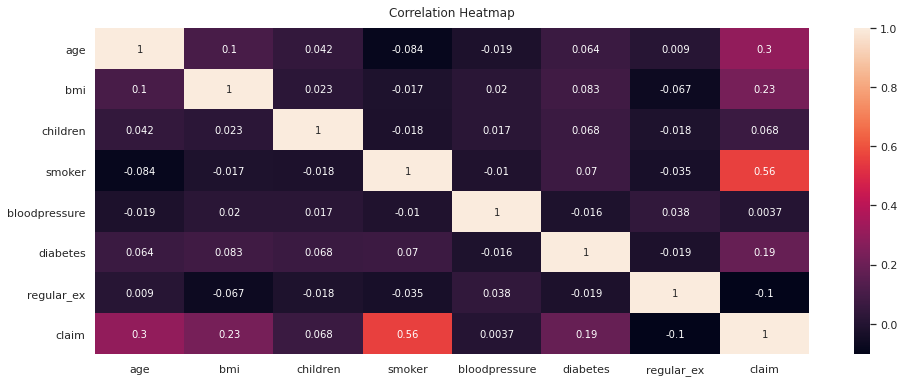

In [29]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), annot=True)

# Give a title to the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

**f. Outliers (display a boxplot)**

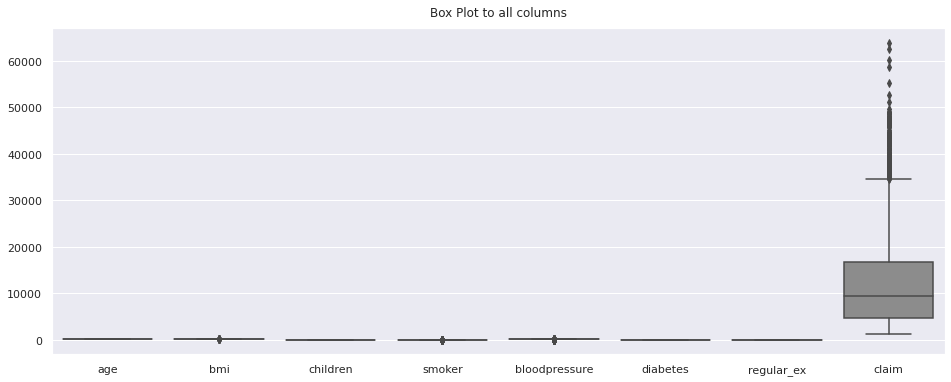

In [30]:
plt.figure(figsize=(16, 6))
ax = sns.boxplot(data=df)

ax.set_title('Box Plot to all columns', fontdict={'fontsize':12}, pad=12);

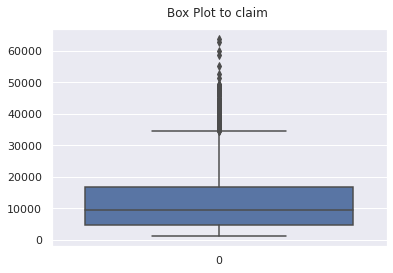

In [31]:
ax = sns.boxplot(data=df['claim'])
ax.set_title('Box Plot to claim ', fontdict={'fontsize':12}, pad=12);

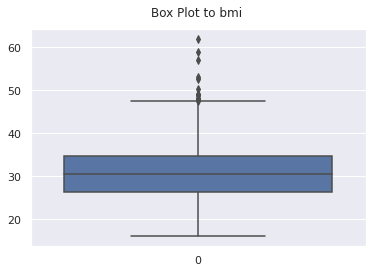

In [32]:
ax = sns.boxplot(data=df['bmi'])
ax.set_title('Box Plot to bmi ', fontdict={'fontsize':12}, pad=12);

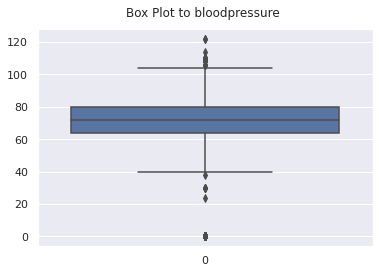

In [33]:
ax = sns.boxplot(data=df['bloodpressure'])
ax.set_title('Box Plot to bloodpressure ', fontdict={'fontsize':12}, pad=12);

**g. Remove outliers (using IQR)**

In [34]:
# remove outliers from 'claim', 'bmi', 'bloodpressure'
def outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(df, "claim")
u_bmi, l_bmi = outliers(df, "bmi")
u_blpress, l_blpress = outliers(df, "bloodpressure")

print("claim: ")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

print("\nbmi: ")
print("Upper whisker: ", u_bmi)
print("Lower Whisker: ", l_bmi)

print("\nbloodpressure: ")
print("Upper whisker: ", u_blpress)
print("Lower Whisker: ", l_blpress)

df = df[(df['claim'] > lower) & (df['claim'] < upper) &
            (df['bmi'] > l_bmi) & (df['bmi'] < u_bmi)  &
            (df['bloodpressure'] > l_blpress) & (df['bloodpressure'] < u_blpress)]


claim: 
Upper whisker:  34489.35625
Lower Whisker:  -13109.15375

bmi: 
Upper whisker:  47.54999999999999
Lower Whisker:  13.550000000000006

bloodpressure: 
Upper whisker:  104.0
Lower Whisker:  40.0


In [35]:
# reset index
df.reset_index(drop=True, inplace=True)
df.head()

,age,sex,bmi,children,smoker,region,bloodpressure,diabetes,regular_ex,claim
0,24,male,32.7,0,1,southwest,68,1,0,34472.84
1,19,female,33.1,0,1,southeast,82,0,0,34439.86
2,18,male,31.7,2,1,southeast,88,1,0,34303.17
3,24,male,31.1,0,1,northeast,74,1,0,34254.05
4,23,female,31.4,0,1,southwest,82,1,0,34166.27


In [36]:
df.shape

(1114, 10)

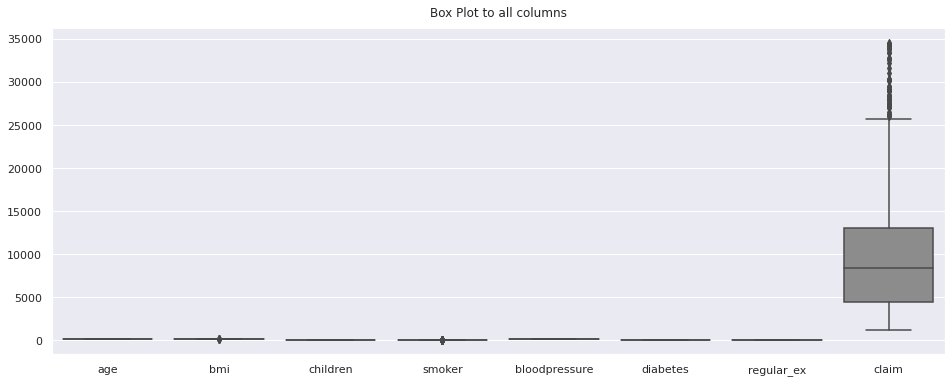

In [37]:
plt.figure(figsize=(16, 6))
ax = sns.boxplot(data=df)

ax.set_title('Box Plot to all columns', fontdict={'fontsize':12}, pad=12);

**h. Distribution of the target column(“claim”)**

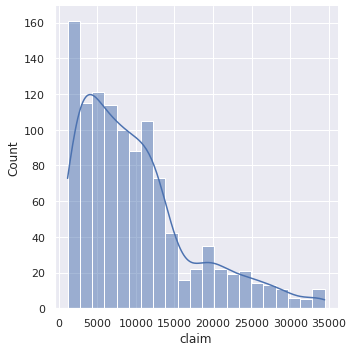

In [38]:
sns.displot(df, x="claim", kde=True);

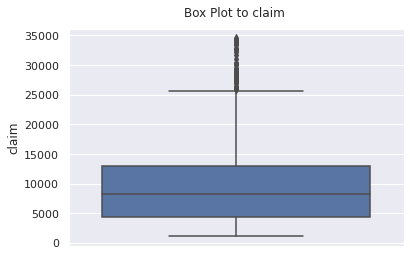

In [39]:
ax = sns.boxplot(y=df['claim']);
ax.set_title('Box Plot to claim ', fontdict={'fontsize':12}, pad=12);

**2. Transform the column “claim” using log transformation (hint: use np.log(‘column’) and append the transformed column to the dataframe under the column name “log_claim” - optionally you can check the effect of the transformation by plotting histogram of “claim” before and after transformation. (2 points)**

In [40]:
df['log_claim'] = np.log(df["claim"])

In [41]:
kurt_claim = kurtosis(df['claim'])
skew_claim = skew(df['claim'])

kurt_log = kurtosis(df['log_claim'])
skew_log = skew(df['log_claim'])


print(f'Kurtosis of claim is {kurt_claim}')
print(f'Skewness of claim is {skew_claim}')

print(f'\nKurtosis of log_claim is {kurt_log}')
print(f'Skewness of log_claim is {skew_log}')


Kurtosis of claim is 1.0109302183143898
Skewness of claim is 1.1903579983713395

Kurtosis of log_claim is -0.6528332368807437
Skewness of log_claim is -0.30051357314832056


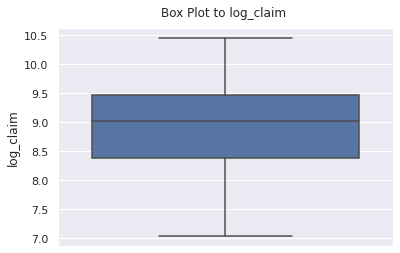

In [42]:
ax = sns.boxplot(y=df['log_claim']);
ax.set_title('Box Plot to log_claim ', fontdict={'fontsize':12}, pad=12);

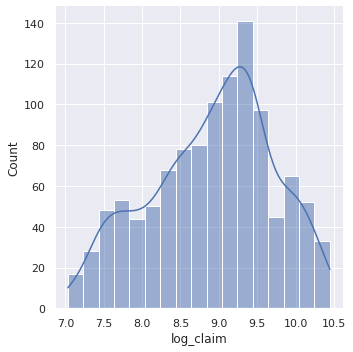

In [43]:
ax = sns.displot(df, x="log_claim", kde=True);

**3. Encode the categorical variables. In case a column has more than 2 categories,
use one-hot encoding. (2 points)**

In [44]:
# encode sex column with value between 0 and 1
le = preprocessing.LabelEncoder()

df['sex'] = df[['sex']].apply(le.fit_transform)

In [45]:
# Get one hot encoding of columns region
one_hot = pd.get_dummies(df['region'])

# Drop column B as it is now encoded
df = df.drop('region',axis = 1)

# Join the encoded df
df = df.join(one_hot)
df  

,age,sex,bmi,children,smoker,bloodpressure,diabetes,regular_ex,claim,log_claim,northeast,northwest,southeast,southwest
0,24,1,32.7,0,1,68,1,0,34472.84,10.447927,0,0,0,1
1,19,0,33.1,0,1,82,0,0,34439.86,10.446970,0,0,1,0
2,18,1,31.7,2,1,88,1,0,34303.17,10.442993,0,0,1,0
3,24,1,31.1,0,1,74,1,0,34254.05,10.441560,1,0,0,0
4,23,0,31.4,0,1,82,1,0,34166.27,10.438994,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1109,18,1,34.4,0,0,55,1,0,1137.47,7.036562,0,0,1,0
1110,18,1,34.1,0,0,90,1,0,1137.01,7.036157,0,0,1,0
1111,18,1,33.7,0,0,80,1,1,1136.40,7.035621,0,0,1,0
1112,18,1,33.3,0,0,80,1,1,1135.94,7.035216,0,0,1,0


**4. Separate out the dependent variable(“claim”) from the independent
variables(exclude claim and log_claim from the rest of the variables). (1 point)**

In [46]:
X = df.drop(['claim', 'log_claim'],axis = 1)
Y = df['claim']
Z = df['log_claim']

**5. Split the data into testing and training sets (X_train, y_train, X_test, y_test). (1
point)**

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

print(f'X_train :  {X_train.shape[0]} rows , {X_train.shape[1]} columns')
print(f'X_test :  {X_test.shape[0]} rows, {X_test.shape[1]} columns')


print(f'\ny_train :  {y_train.shape[0]} rows')
print(f'y_test :  {y_test.shape[0]} rows')

X_train :  746 rows , 12 columns
X_test :  368 rows, 12 columns

y_train :  746 rows
y_test :  368 rows


In [48]:
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform (X_test)

**6. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data. (2 points)**

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lin_reg = LinearRegression().fit(X_train, y_train)
predict = lin_reg.predict(X_test)

r2_score(y_test, predict)

0.5891548396602004

**7. Plot a scatter plot between the actual values and the predicted values for the test set (because plain numbers might not give the entire picture). (1 point)**

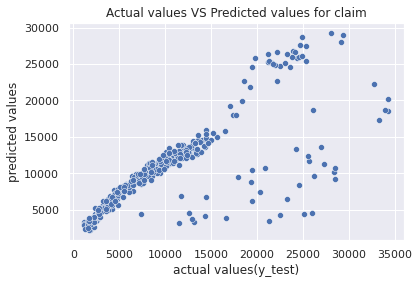

In [50]:
sns.scatterplot(x =y_test, y = predict)
plt.title('Actual values VS Predicted values for claim')

# Set x-axis and y-axis labels
plt.xlabel('actual values(y_test)')
plt.ylabel('predicted values');

**8. Comment on the performance of the model. (1 point)**

**9. Repeat steps 4, 5, 6,7 and 8 except, this time use “log_claim” as your dependent variable (note: “claim” cannot be among the predictors). (5 points)**

In [51]:
X_train, X_test, z_train, z_test = train_test_split(X, Z, test_size=0.33, random_state=42)

print(f'X_train :  {X_train.shape[0]} rows , {X_train.shape[1]} columns')
print(f'X_test :  {X_test.shape[0]} rows, {X_test.shape[1]} columns')


print(f'\nz_train :  {y_train.shape[0]} rows')
print(f'z_test :  {y_test.shape[0]} rows')

X_train :  746 rows , 12 columns
X_test :  368 rows, 12 columns

z_train :  746 rows
z_test :  368 rows


In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lin_reg_log = LinearRegression().fit(X_train, z_train)
predict_log = lin_reg_log.predict(X_test)

r2_score(z_test, predict_log)

0.6575955160728137

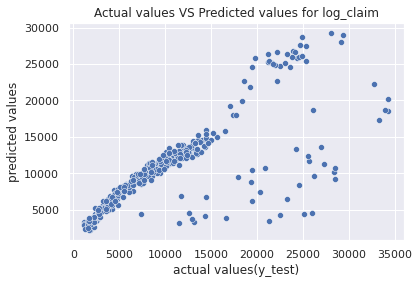

In [53]:
sns.scatterplot(x =y_test, y = predict)
plt.title('Actual values VS Predicted values for log_claim')

# Set x-axis and y-axis labels
plt.xlabel('actual values(y_test)')
plt.ylabel('predicted values');

**10. Compare the performance of the models trained using the skewed dependent variable as it is and log transformed variable - write your comments and conclude the project. (2 points)**

In [54]:
print("predict")
print(kurtosis(predict))
print(skew(predict))

print("\npredict_log")
print(kurtosis(predict_log))
print(skew(predict_log))


predict
1.457445446724404
1.2122910761048562

predict_log
-0.11971625240109951
0.39200860472667476
